In [1]:
'''
install the library to download and extract images from MNIST dataset
'''
! pip install get-mnist

DEPRECATION: Python 2.7 reached the end of its life on January 1st, 2020. Please upgrade your Python as Python 2.7 is no longer maintained. pip 21.0 will drop support for Python 2.7 in January 2021. More details about Python 2 support in pip can be found at https://pip.pypa.io/en/latest/development/release-process/#python-2-support
Defaulting to user installation because normal site-packages is not writeable


In [1]:
def true_label(x):
    return label_names[x]

[MNIST] Caching data at FASHION_MNIST
[MNIST] Found http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/train-images-idx3-ubyte.gz in cache.
[MNIST] Found http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/t10k-images-idx3-ubyte.gz in cache.
[MNIST] Found http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/train-labels-idx1-ubyte.gz in cache.
[MNIST] Found http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/t10k-labels-idx1-ubyte.gz in cache.


(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)
labels: ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

this represent a : Sandal


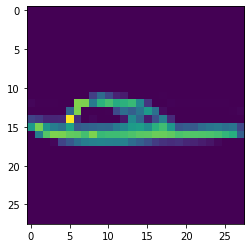

In [2]:
'''
load the dataset
x, y: images and labels for training phase
x_test, y_test: images and label for test phase
'''

from mnist import fashion_mnist
import matplotlib.pyplot as plt
x, y, x_test, y_test = fashion_mnist('FASHION_MNIST')
label_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

print(x.shape)
print(y.shape)
print(x_test.shape)
print(y_test.shape)
print('labels:', label_names)

example = 30 # change your image here
g = plt.imshow(x[example])
print('\nthis represent a : ' + true_label(y[example]))

In [3]:
print(x[0])
print(y[0])

[[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   1.   0.
    0.  13.  73.   0.   0.   1.   4.   0.   0.   0.   0.   1.   1.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   3.   0.
   36. 136. 127.  62.  54.   0.   0.   0.   1.   3.   4.   0.   0.   3.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   6.   0.
  102. 204. 176. 134. 144. 123.  23.   0.   0.   0.   0.  12.  10.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
  155. 236. 207. 178. 107. 156. 161. 109.  64.  23.  77. 1

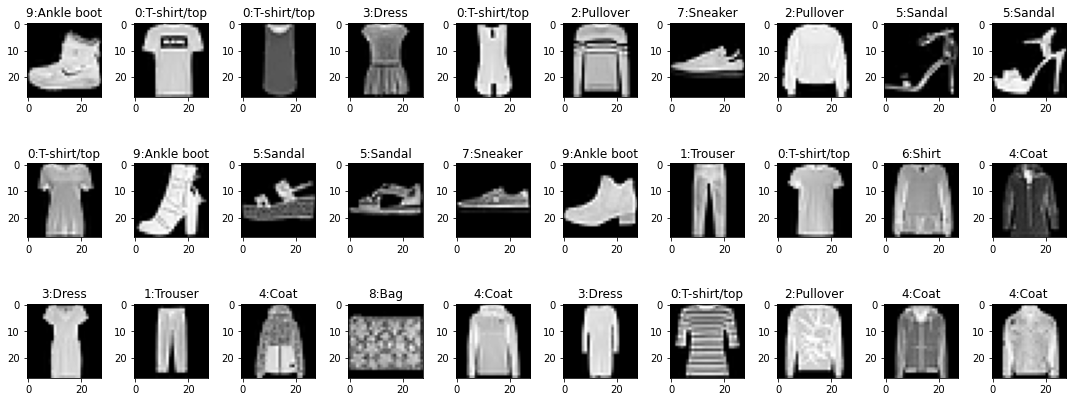

In [4]:
'''
illustrate several images and corresponding labels in the training set
'''

import matplotlib.pyplot as plt

num_row = 3
num_col = 10
num = num_row * num_col

fig, axes = plt.subplots(num_row, num_col,
                        figsize=(1.5*num_col,2*num_row))
for i in range(num):
    ax = axes[i//num_col, i%num_col]
    ax.imshow(x[i], cmap='gray')
    ax.set_title('%d:%s'%(y[i], label_names[y[i]]))
plt.tight_layout()
plt.show()

9    6000
8    6000
7    6000
6    6000
5    6000
4    6000
3    6000
2    6000
1    6000
0    6000
dtype: int64

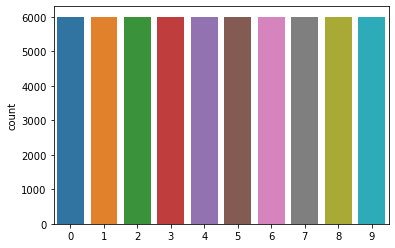

In [5]:
import seaborn as sns
import pandas as pd

df = pd.Series(y)

g = sns.countplot(df)

df.value_counts()

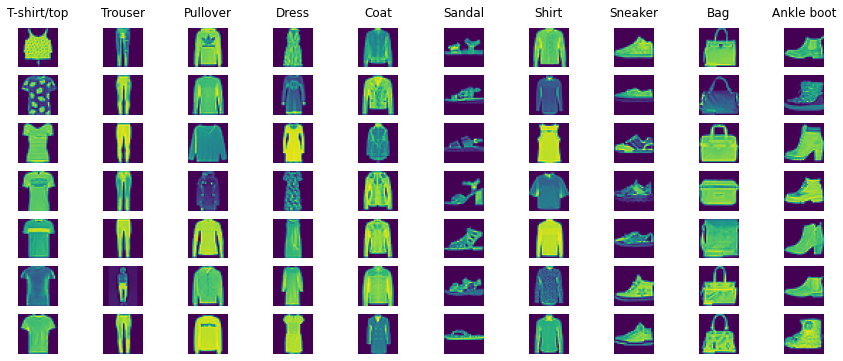

In [6]:
import numpy as np 

def visualize_sample(X_train, y_train, label_names, samples_per_class=7):
    """visualize some samples in the training datasets """ 
    fig, axes = plt.subplots(7, 10, figsize=(1.5*num_col,2*num_row)) # increase space between each image and title
    num_classes = len(label_names)
    for y, cls in enumerate(label_names):
        idxs = np.flatnonzero(y_train == y) # get all the indexes of cls
        idxs = np.random.choice(idxs, samples_per_class, replace=False)
        for i, idx in enumerate(idxs): # plot the image one by one
            plt_idx = i * num_classes + y + 1 # i*num_classes and y+1 determine the row and column respectively
            plt.subplot(samples_per_class, num_classes, plt_idx)
            plt.imshow(X_train[idx].astype('uint8'))
            plt.axis('off')
            if i == 0:
                plt.title(cls, y=1.12)          
    plt.show()
    
visualize_sample(x, y, label_names)

In [8]:
import numpy as np
from keras.utils import to_categorical
from sklearn.preprocessing import MinMaxScaler

num_px = x.shape[1]
x = np.array(x)
x_test = np.array(x_test)


x = (x.reshape(x.shape[0], -1).T) / 255
x_test = (x_test.reshape(x_test.shape[0], -1).T) / 255


scaling = MinMaxScaler(feature_range=(-1,1)).fit(x)
x = scaling.transform(x)
x_test = scaling.transform(x_test)


print(y.shape)
print ("x's shape: " + str(x.shape))
print ("x_test's shape: " + str(x_test.shape))

(60000,)
x's shape: (60000, 784)
x_test's shape: (10000, 784)


In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB


models = []
models.append(('LR', LogisticRegression(multi_class='multinomial',solver='lbfgs', max_iter=100)))
models.append(('KNN', KNeighborsClassifier()))
models.append(('DTE', DecisionTreeClassifier(criterion='entropy')))
models.append(('DTG',DecisionTreeClassifier(criterion='gini')))
models.append(('RFE',RandomForestClassifier(criterion='entropy')))
models.append(('RFG',RandomForestClassifier(criterion='gini')))
models.append(('SVM', SVC(kernel='linear', C=1, gamma='auto')))
models.append(('NB', GaussianNB()))

In [18]:
from sklearn.metrics import accuracy_score

for name, model in models:
    model.fit(x,y)
    y_test_pred = model.predict(x_test)
    print("Test Accuracy of %s: %.2f%%" % (name, accuracy_score(y_test, y_test_pred) * 100))

/Users/apple/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Test Accuracy of LR: 84.43%
Test Accuracy of KNN: 85.89%
Test Accuracy of DTE: 79.93%
Test Accuracy of DTG: 78.36%
Test Accuracy of RFE: 87.74%
Test Accuracy of RFG: 87.21%
Test Accuracy of SVM: 84.64%
Test Accuracy of NB: 69.34%


In [53]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')

results = []
names = []
for name, model in models:
  kfold = KFold(n_splits=5, shuffle=True)
  cv_results = cross_val_score(model, x, y, cv=kfold, scoring='accuracy')
  results.append(cv_results)
  names.append(name)
  print("Test Accuracy and Standard Deviation of %s: %.2f%% (%f)" % (name, cv_results.mean()*100, cv_results.std()))

Test Accuracy and Standard Deviation of LR: 85.63% (0.004018)
Test Accuracy and Standard Deviation of KNN: 86.04% (0.001981)
Test Accuracy and Standard Deviation of DTE: 79.83% (0.002877)
Test Accuracy and Standard Deviation of DTG: 78.81% (0.001705)
Test Accuracy and Standard Deviation of RFE: 87.92% (0.003587)
Test Accuracy and Standard Deviation of RFG: 87.76% (0.003813)
Test Accuracy and Standard Deviation of SVM: 85.84% (0.002604)
Test Accuracy and Standard Deviation of NB: 69.69% (0.001619)
